In [28]:
import pandas as pd

In [29]:
import numpy as np

In [30]:
bank_df = pd.read_csv( 'bank.csv')
bank_df.head(5)

age          job  marital  education default  balance housing-loan  \
0   30   unemployed  married    primary      no     1787           no   
1   33     services  married  secondary      no     4789          yes   
2   35   management   single   tertiary      no     1350          yes   
3   30   management  married   tertiary      no     1476          yes   
4   59  blue-collar  married  secondary      no        0          yes   

  personal-loan  current-campaign  previous-campaign subscribed  
0            no                 1                  0         no  
1           yes                 1                  4         no  
2            no                 1                  1         no  
3           yes                 4                  0         no  
4            no                 1                  0         no

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [31]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [6]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

In [7]:
# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

In [8]:
##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes,replace=True, n_samples=2000) #2000

In [9]:
# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [10]:
len(new_bank_df)

6000

In [11]:
new_bank_df.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [12]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [13]:
print(new_bank_df)

      age            job   marital  education default  balance housing-loan  \
4124   50  self-employed  divorced   tertiary      no       13          yes   
1859   32    blue-collar   married  secondary      no        0          yes   
412    75        retired  divorced   tertiary      no     3810          yes   
3540   58        retired   married    primary      no      565           no   
1234   35     management   married   tertiary      no        8          yes   
...   ...            ...       ...        ...     ...      ...          ...   
680    28         admin.    single    unknown      no      174           no   
4441   38     management   married   tertiary      no    12877           no   
957    55     management  divorced    unknown      no        2          yes   
662    38     technician    single   tertiary      no       25          yes   
3588   27     technician    single  secondary      no      842           no   

     personal-loan  current-campaign  previous-camp

In [14]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )

In [15]:
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [16]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [17]:
X

age  balance  current-campaign  previous-campaign  job_blue-collar  \
4124   50       13                 1                  0                0   
1859   32        0                 2                  0                1   
412    75     3810                 1                  1                0   
3540   58      565                 1                  0                0   
1234   35        8                 4                  0                0   
...   ...      ...               ...                ...              ...   
680    28      174                 1                  0                0   
4441   38    12877                 3                  0                0   
957    55        2                 1                  0                0   
662    38       25                 2                  0                0   
3588   27      842                 1                  1                0   

      job_entrepreneur  job_housemaid  job_management  job_retired  \
4124                 0              0               0            0   
1859                 0              0               0            0   
412                  0              0               0            1   
3540                 0              0               0            1   
1234                 0              0               1            0   
...                ...            ...             ...          ...   
680                  0              0               0            0   
4441                 0              0               1            0   
957                  0              0               1            0   
662                  0              0               0            0   
3588                 0              0               0            0   

      job_self-employed  ...  job_unemployed  job_unknown  marital_married  \
4124                  1  ...               0            0                0   
1859                  0  ...               0            0                1   
412                   0  ...               0            0                0   
3540                  0  ...               0            0                1   
1234                  0  ...               0            0                1   
...                 ...  ...             ...          ...              ...   
680                   0  ...               0            0                0   
4441                  0  ...               0            0                1   
957                   0  ...               0            0                0   
662                   0  ...               0            0                0   
3588                  0  ...               0            0                0   

      marital_single  education_secondary  education_tertiary  \
4124               0                    0                   1   
1859               0                    1                   0   
412                0                    0                   1   
3540               0                    0                   0   
1234               0                    0                   1   
...              ...                  ...                 ...   
680                1                    0                   0   
4441               0                    0                   1   
957                0                    0                   0   
662                1                    0                   1   
3588               1                    1                   0   

      education_unknown  default_yes  housing-loan_yes  personal-loan_yes  
4124                  0            0                 1                  0  
1859                  0            0                 1                  0  
412                   0            0                 1                  0  
3540                  0            0                 0                  0  
1234                  0            0                 1                  0  
...                 ...          ...               ...                ...  
68

In [18]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [19]:
## splitting training and test data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,test_size = 0.3,random_state = 42 )

In [20]:
### logistic regression
## building the model
from sklearn.linear_model import LogisticRegression
## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit( train_X, train_y)


LogisticRegression()

In [21]:
## make prediction
pred_y = logit.predict(test_X)

In [22]:
### predicting all the Y values for test_X
pred_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
## predicint
pred_single = logit.predict([[34,202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]])
pred_single

C:\Users\gsripath\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
## confusion matrix

In [25]:
## Importing the metrics
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


In [32]:
## Defining the matrix to draw the confusion metrix from actual and predicted class labels
def draw_cm( actual, predicted ):
# Invoking confusion_matrix from metric package. The matrix will oriented as[1,0] i.e.
# the classes with label 1 will be reprensted the first row and 0 as secondrow
    cm = metrics.confusion_matrix( actual, predicted )
    ## Confustion will be plotted as heatmap for better visualization
    ## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Subscribed", "Not Subscribed"] ,
    yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



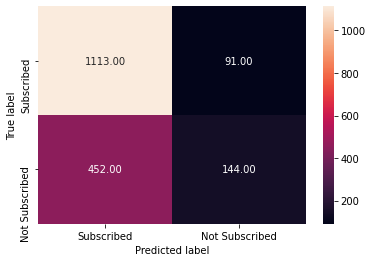

In [33]:
cm = draw_cm( test_y, pred_y )


In [ ]:

#ROC AUC Score

## Predicting the probability values for test cases
predict_proba_df = pd.DataFrame( logit.predict_proba( test_X ) )
predict_proba_df.head()
cm

In [ ]:
## Initializing the DataFrame with actual class lables
test_results_df = pd.DataFrame( { 'actual': test_y } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [ ]:
test_results_df.head(5)

In [ ]:
# Passing actual class labels and the predicted probability values to compute ROC AUC score.
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1)
round( float( auc_score ), 2 )

In [ ]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
## - ROC Auc Score
## - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

In [ ]:
## Invoking draw_roc_curve with the logistic regresson model
_, _, _, _ = draw_roc_curve( logit, test_X, test_y )